In [57]:
import pandas as pd
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
data = pd.read_csv('../data/sb_data.csv')

In [58]:
data.head()

,title,text,subject,date,fake
0,France invites U.S. to Dec. 13 summit on boost...,ACCRA (Reuters) - French President Emmanuel Ma...,worldnews,"November 30, 2017",0
1,Trump keeps politics on his Thanksgiving menu,"WEST PALM BEACH, Fla./WASHINGTON (Reuters) - U...",politicsNews,"November 24, 2016",0
2,Ireland's Fianna Fail party says will be elect...,DUBLIN (Reuters) - Ireland s second-largest pa...,worldnews,"November 24, 2017",0
3,REPUBLICAN LEADER Implies He May Not Seat Roy ...,The New York Times just confirmed what we ve a...,politics,"Nov 12, 2017",1
4,U.S. Senate approves Trump pick as top Fed reg...,WASHINGTON (Reuters) - The U.S. Senate on Thur...,politicsNews,"October 5, 2017",0


In [59]:
# 결측치 확인
data.isnull().values.any()

False

In [60]:
data.drop_duplicates(subset=['text'], inplace=True)
print(f'총 샘플의 개수 : {len(data)}')

총 샘플의 개수 : 31764


In [61]:
data.groupby('fake').size().reset_index(name='count')

,fake,count
0,0,16984
1,1,14780


In [62]:
from string import punctuation
# 데이터 전처리
def repro(raw_sent):
    pro_sent = raw_sent.encode('utf8').decode('ascii', 'ignore')
    result = ''
    for w in pro_sent:
        if w not in punctuation: # 구두점 제거
            result += w
    return result.lower() # 소문자로 변환

In [63]:
re_text = [repro(text) for text in data['text']]
data['processed_text'] = re_text  # 전처리된 텍스트를 새로운 컬럼에 저장

In [64]:
data

,title,text,subject,date,fake,processed_text
0,France invites U.S. to Dec. 13 summit on boost...,ACCRA (Reuters) - French President Emmanuel Ma...,worldnews,"November 30, 2017",0,accra reuters french president emmanuel macro...
1,Trump keeps politics on his Thanksgiving menu,"WEST PALM BEACH, Fla./WASHINGTON (Reuters) - U...",politicsNews,"November 24, 2016",0,west palm beach flawashington reuters us pres...
2,Ireland's Fianna Fail party says will be elect...,DUBLIN (Reuters) - Ireland s second-largest pa...,worldnews,"November 24, 2017",0,dublin reuters ireland s secondlargest party ...
3,REPUBLICAN LEADER Implies He May Not Seat Roy ...,The New York Times just confirmed what we ve a...,politics,"Nov 12, 2017",1,the new york times just confirmed what we ve a...
4,U.S. Senate approves Trump pick as top Fed reg...,WASHINGTON (Reuters) - The U.S. Senate on Thur...,politicsNews,"October 5, 2017",0,washington reuters the us senate on thursday ...
...,...,...,...,...,...,...
35913,Tennessee governor endorses Rubio in Republica...,WASHINGTON (Reuters) - Tennessee Governor Bill...,politicsNews,"February 25, 2016",0,washington reuters tennessee governor bill ha...
35914,Republican Trump backed Iraq war in 2002 inter...,(Reuters) - Republican presidential front-runn...,politicsNews,"February 19, 2016",0,reuters republican presidential frontrunner d...
35915,Impact of firing Sessions could be troublesome...,(Reuters) - President Donald Trump could trigg...,politicsNews,"July 25, 2017",0,reuters president donald trump could trigger ...
35916,U.S. hopes for more from Russia after Crimean ...,KIEV (Reuters) - The release of two Crimean Ta...,worldnews,"October 28, 2017",0,kiev reuters the release of two crimean tatar...


In [65]:
X_data = data['processed_text']
y_data = data['fake']

X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size=0.2, random_state=0, stratify=y_data) # stratify=y_data : 0과 1의 수를 균일하게 만들어줌

tokenizer = Tokenizer(num_words=10000)
tokenizer.fit_on_texts(X_train)

X_train_encoded = tokenizer.texts_to_sequences(X_train)
print(X_train_encoded[:5])

[[58, 4, 2647, 495, 8, 182, 1440, 74, 133, 245, 65, 142, 759, 9, 1204, 25, 4, 2809, 2727, 1747, 313, 7, 1, 90, 12, 40, 714, 45, 2, 154, 50, 4, 2829, 94, 148, 15, 5, 141, 1176, 128, 79, 28, 6, 4, 460, 2479, 9, 689, 1424, 607, 6, 4494, 97, 50, 4, 286, 5, 4803, 90, 2647, 11, 52, 3, 289, 70, 7, 4202, 519, 665, 5, 2809, 2727, 11, 3011, 18, 4, 988, 3, 145, 9, 79, 2647, 60, 130, 201, 257, 29, 28, 6, 575, 26, 553, 1844, 63, 1, 753, 460, 304, 22, 714, 2, 1597, 41, 3041, 142, 1284, 1123, 6, 4, 2647, 60, 136, 8, 204, 12, 97, 156, 2546, 60, 130, 89, 31, 714, 45, 2, 1386, 1, 575, 50, 553, 1844, 26, 4, 1747, 3401, 26, 4, 3181, 747, 117, 94, 532, 519, 665, 1233, 15, 4, 62, 219, 1793, 5, 971, 1040, 4841, 29, 40, 237, 907, 496, 9, 126, 166, 12, 94, 261, 7, 13, 325, 24, 1375, 1, 2147, 3, 1, 122, 97, 55, 13, 1356, 14, 11, 3066, 385, 119, 22, 1, 94, 99, 7, 4543, 592, 28, 515, 2, 719, 66, 5, 121, 67, 2, 30, 71, 2641, 20, 4, 601, 1379, 2707, 1, 2647, 60, 294, 9, 142, 90, 12, 6, 4, 167, 50, 1, 601, 1, 2696, 

In [66]:
from tensorflow.keras.preprocessing.text import Tokenizer
tokenizer = Tokenizer(num_words=10000)  # 상위 10,000개의 단어만 사용
tokenizer.fit_on_texts(X_train)
X_train_encoded = tokenizer.texts_to_sequences(X_train)
print(X_train_encoded[:5])

[[58, 4, 2647, 495, 8, 182, 1440, 74, 133, 245, 65, 142, 759, 9, 1204, 25, 4, 2809, 2727, 1747, 313, 7, 1, 90, 12, 40, 714, 45, 2, 154, 50, 4, 2829, 94, 148, 15, 5, 141, 1176, 128, 79, 28, 6, 4, 460, 2479, 9, 689, 1424, 607, 6, 4494, 97, 50, 4, 286, 5, 4803, 90, 2647, 11, 52, 3, 289, 70, 7, 4202, 519, 665, 5, 2809, 2727, 11, 3011, 18, 4, 988, 3, 145, 9, 79, 2647, 60, 130, 201, 257, 29, 28, 6, 575, 26, 553, 1844, 63, 1, 753, 460, 304, 22, 714, 2, 1597, 41, 3041, 142, 1284, 1123, 6, 4, 2647, 60, 136, 8, 204, 12, 97, 156, 2546, 60, 130, 89, 31, 714, 45, 2, 1386, 1, 575, 50, 553, 1844, 26, 4, 1747, 3401, 26, 4, 3181, 747, 117, 94, 532, 519, 665, 1233, 15, 4, 62, 219, 1793, 5, 971, 1040, 4841, 29, 40, 237, 907, 496, 9, 126, 166, 12, 94, 261, 7, 13, 325, 24, 1375, 1, 2147, 3, 1, 122, 97, 55, 13, 1356, 14, 11, 3066, 385, 119, 22, 1, 94, 99, 7, 4543, 592, 28, 515, 2, 719, 66, 5, 121, 67, 2, 30, 71, 2641, 20, 4, 601, 1379, 2707, 1, 2647, 60, 294, 9, 142, 90, 12, 6, 4, 167, 50, 1, 601, 1, 2696, 

In [67]:
word_to_index = tokenizer.word_index

In [68]:
vocab_size = len(word_to_index) + 1
print(f'단어 집합의 크기 : {vocab_size}')

단어 집합의 크기 : 177535


In [69]:
# max_lengths = 0
# for sample in X_train_encoded:
#     lengths = len(sample)
#     if lengths > max_lengths:
#         max_lengths = lengths
# print(f'text의 최대 길이 : {max_lengths}') # 7265

In [70]:
max_lengths=1000

In [71]:
lengths = [] # 문장의 길이를 담을 리스트
for sample in X_data:
    lengths.append(len(sample))

print(lengths)

[2355, 4807, 460, 2029, 2114, 1497, 2492, 2037, 1, 4139, 5407, 4225, 4158, 1597, 5376, 1988, 985, 975, 3480, 1491, 474, 2514, 3387, 2642, 1316, 671, 1223, 1360, 921, 2422, 1385, 961, 3281, 1545, 2150, 7748, 1073, 440, 1404, 3751, 816, 3403, 2114, 2797, 1425, 1537, 1346, 1472, 1350, 2409, 4587, 2414, 2486, 2205, 6030, 3840, 1744, 1407, 369, 194, 2984, 2514, 5375, 3401, 2086, 2282, 2512, 1239, 1447, 1739, 2267, 1573, 558, 1867, 302, 2157, 1434, 579, 1616, 370, 2543, 1493, 727, 1181, 1452, 1963, 746, 259, 2887, 4705, 2723, 5355, 1539, 2235, 595, 2327, 2032, 552, 2689, 5923, 456, 113, 171, 3670, 16467, 2112, 3917, 2520, 1595, 1619, 2405, 2565, 2094, 2166, 1209, 1240, 4156, 5055, 1080, 1116, 623, 1879, 3857, 1366, 732, 1879, 1179, 2358, 675, 2174, 2905, 1122, 2948, 1276, 743, 2484, 4880, 231, 3842, 2255, 1362, 1758, 581, 5290, 1184, 424, 3210, 1618, 2975, 4452, 2133, 2138, 6613, 3092, 494, 540, 3024, 2157, 3604, 646, 1426, 3650, 1314, 334, 1967, 2535, 4687, 3358, 2970, 503, 1714, 3623, 3994

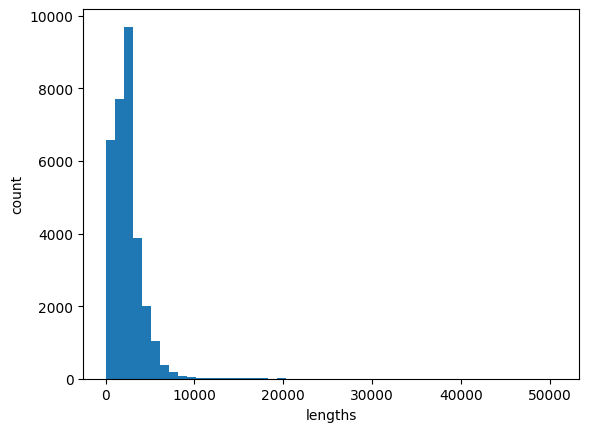

In [72]:
plt.hist(lengths, bins = 50)
plt.xlabel('lengths')
plt.ylabel('count')
plt.show()

In [73]:
X_train_padding = pad_sequences(X_train_encoded, maxlen = max_lengths)

In [74]:
X_train_padding

array([[   0,    0,    0, ...,   46, 1361,   12],
       [   0,    0,    0, ...,  545, 1473,  905],
       [   0,    0,    0, ...,  161, 1676,  416],
       ...,
       [   0,    0,    0, ...,  161, 1676,  416],
       [   0,    0,    0, ..., 1597,    4, 2001],
       [   0,    0,    0, ..., 2488, 4926,  416]])

In [75]:
from tensorflow.keras.layers import SimpleRNN, Embedding, Dense
from tensorflow.keras.models import Sequential
embedding_dim = 8
hidden_units = 32

model = Sequential()
model.add(Embedding(vocab_size, embedding_dim))
model.add(SimpleRNN(hidden_units))
model.add(Dense(1, activation = 'sigmoid'))

model.compile(optimizer='rmsprop', loss = 'binary_crossentropy', metrics = ['acc']) # metrics = ['acc'] : 분류이기 때문에
history = model.fit(X_train_padding, y_train, epochs = 5, batch_size=64, validation_split=0.2)

Epoch 1/5
318/318 [==============================] - 125s 360ms/step - loss: 0.3831 - acc: 0.8319 - val_loss: 0.1331 - val_acc: 0.9540
Epoch 2/5
318/318 [==============================] - 130s 409ms/step - loss: 0.1077 - acc: 0.9649 - val_loss: 0.0754 - val_acc: 0.9772
Epoch 3/5
318/318 [==============================] - 128s 403ms/step - loss: 0.0724 - acc: 0.9773 - val_loss: 0.0675 - val_acc: 0.9784
Epoch 4/5
318/318 [==============================] - 128s 402ms/step - loss: 0.0491 - acc: 0.9853 - val_loss: 0.0443 - val_acc: 0.9876
Epoch 5/5
318/318 [==============================] - 149s 469ms/step - loss: 0.0430 - acc: 0.9870 - val_loss: 0.0590 - val_acc: 0.9801


In [76]:
X_test_encoded = tokenizer.texts_to_sequences(X_test)
X_test_padding = pad_sequences(X_test_encoded, maxlen = max_lengths)
accuracy = model.evaluate(X_test_padding, y_test)[1]
print(accuracy)

199/199 [==============================] - 13s 66ms/step - loss: 0.0566 - acc: 0.9819
0.981898307800293


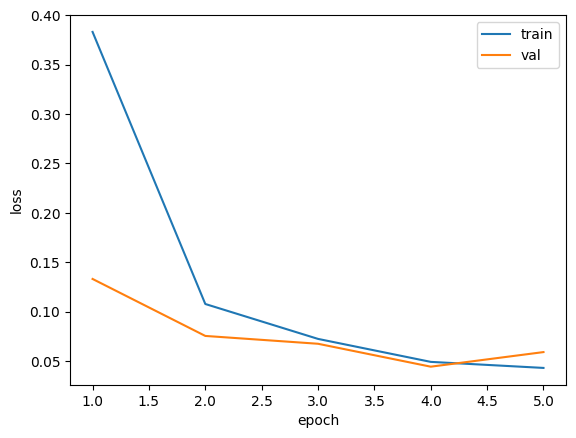

In [77]:
epochs = range(1, len(history.history['acc']) +1) # loss 값이 확 튀었다가 좋아지면 과접합을 의심해야 함
plt.plot(epochs, history.history['loss'])
plt.plot(epochs, history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train','val'])
plt.show()

In [78]:
data = pd.read_csv('../data/sb_validation.csv')